In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [11]:
import pandas as pd

file_path = 'PS_2025.04.01_18.21.30.csv'

exoplanets = pd.read_csv(file_path, sep=',', header=0)

In [12]:
exoplanets.info()
exoplanets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38182 entries, 0 to 38181
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38182 non-null  object 
 1   hostname         38182 non-null  object 
 2   default_flag     38182 non-null  int64  
 3   sy_snum          38182 non-null  int64  
 4   sy_pnum          38182 non-null  int64  
 5   discoverymethod  38182 non-null  object 
 6   pl_orbper        34995 non-null  float64
 7   pl_orbsmax       21601 non-null  float64
 8   pl_rade          26470 non-null  float64
 9   pl_radj          26470 non-null  float64
 10  pl_bmasse        6404 non-null   float64
 11  pl_bmassj        6403 non-null   float64
 12  pl_bmassprov     6404 non-null   object 
 13  pl_orbeccen      18429 non-null  float64
 14  pl_eqt           16739 non-null  float64
 15  st_teff          35179 non-null  float64
 16  st_rad           35227 non-null  float64
 17  st_mass     

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_orbeccen,pl_eqt,st_teff,st_rad,st_mass
0,11 Com b,11 Com,0,2,1,Radial Velocity,NaN,1.210,NaN,NaN,5434.700000,17.100,Msini,NaN,NaN,NaN,NaN,2.60
1,11 Com b,11 Com,0,2,1,Radial Velocity,326.03000,1.290,NaN,NaN,6165.600000,19.400,Msini,0.231,NaN,4742.0,19.00,2.70
2,11 Com b,11 Com,1,2,1,Radial Velocity,323.21000,1.178,NaN,NaN,4914.898486,15.464,Msini,0.238,NaN,4874.0,13.76,2.09
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,516.21997,1.530,NaN,NaN,4684.814200,14.740,Msini,0.080,NaN,4213.0,29.79,2.78
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,NaN,1.510,NaN,NaN,3432.400000,10.800,Msini,NaN,NaN,NaN,NaN,1.70


In [14]:
def categorize_planet(row):
    if row['pl_rade'] >= 6 and row['pl_orbper'] <= 10:
        return 'Hot Jupiter'
    elif row['pl_rade'] >= 6 and row['pl_orbper'] > 10:
        return 'Cold Jupiter'
    elif 2 <= row['pl_rade'] < 6:
        return 'Super Earth'
    elif row['pl_rade'] < 2:
        return 'Terrestrial'
    else:
        return None

# Apply the categorization function to recreate the planet_category column
exoplanets['planet_category'] = exoplanets.apply(categorize_planet, axis=1)

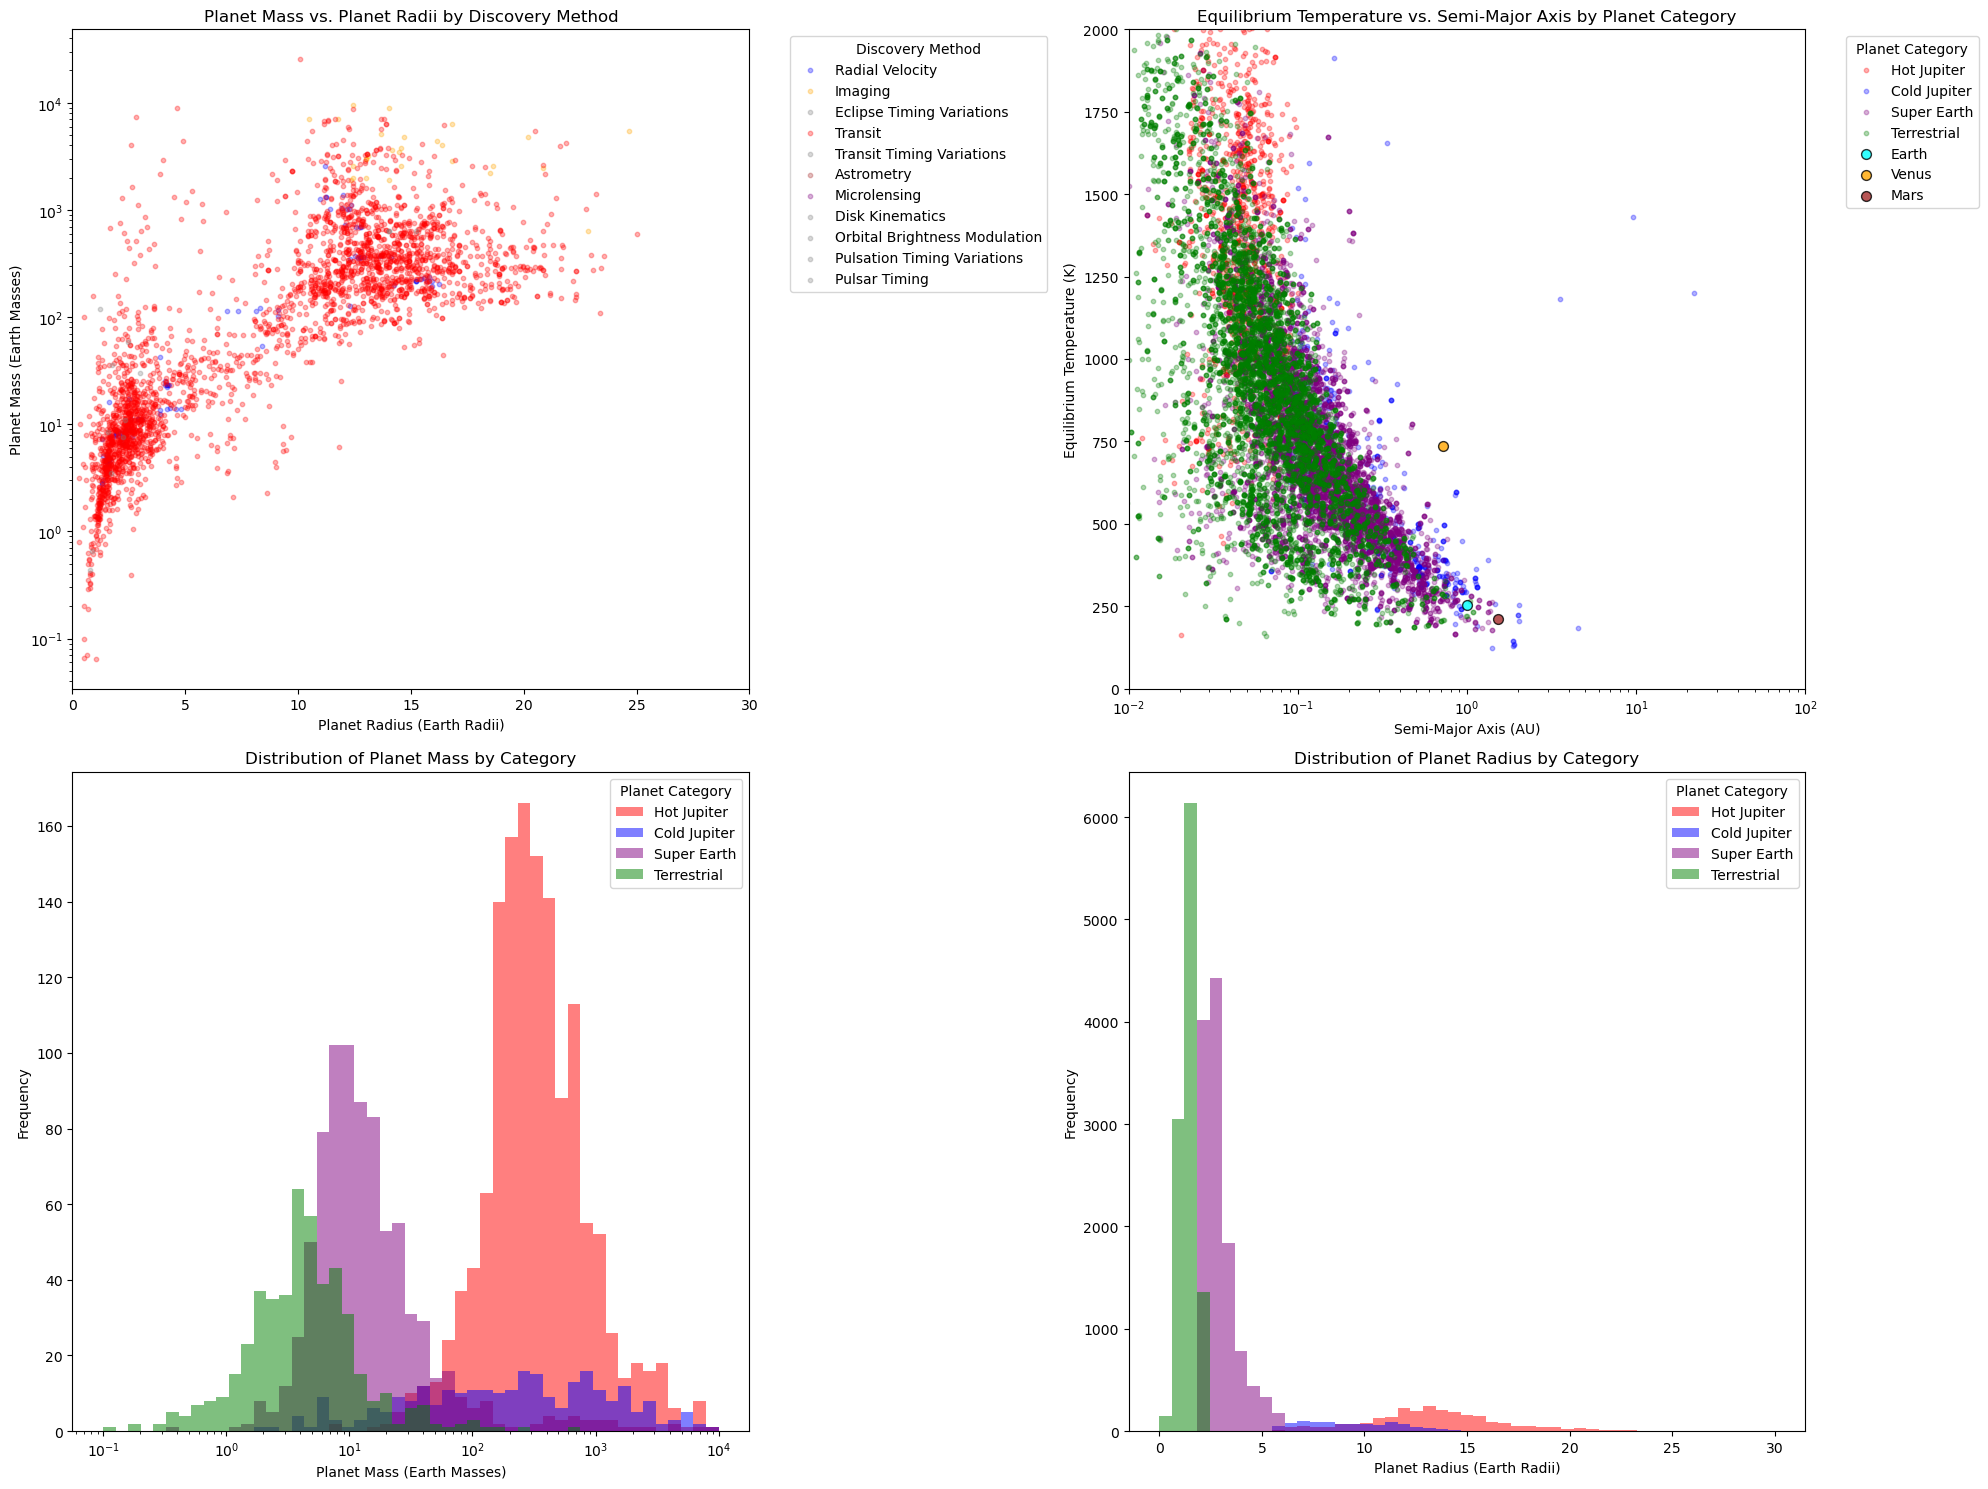

In [15]:

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Subplot 1: Scatter plot of planet mass vs. planet radii
discovery_methods = exoplanets['discoverymethod'].unique()
color_map = {'Radial Velocity': 'blue',
             'Transit': 'red',
             'Imaging': 'orange',
             'Microlensing': 'purple',
             'Astrometry': 'brown'}

for method in discovery_methods:
    color = color_map.get(method, 'gray')  # Default to gray if method not in color_map
    subset = exoplanets[exoplanets['discoverymethod'] == method]
    axes[0, 0].scatter(
        subset['pl_rade'], subset['pl_bmasse'], label=method, alpha=0.3, color=color, s=10
    )

axes[0, 0].set_title('Planet Mass vs. Planet Radii by Discovery Method')
axes[0, 0].set_xlabel('Planet Radius (Earth Radii)')
axes[0, 0].set_ylabel('Planet Mass (Earth Masses)')
axes[0, 0].set_yscale('log') 
axes[0, 0].set_xlim(0, 30)  
axes[0, 0].legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot 2: Relationship Equilibrium Temperature vs Semi-Major Axis
planet_categories = ['Hot Jupiter', 'Cold Jupiter', 'Super Earth', 'Terrestrial']
colors = ['red', 'blue', 'purple', 'green']

for category, color in zip(planet_categories, colors):
    subset = exoplanets[exoplanets['planet_category'] == category]
    axes[0, 1].scatter(
        subset['pl_orbsmax'], subset['pl_eqt'], label=category,
        alpha=0.3, color=color, s=10
    )

# Add points for Earth, Venus, and Mars
solar_system_planets = {
    'Earth': {'pl_orbsmax': 1, 'pl_eqt': 255, 'color': 'cyan'}, 
    'Venus': {'pl_orbsmax': 0.72, 'pl_eqt': 737, 'color': 'orange'},
    'Mars': {'pl_orbsmax': 1.52, 'pl_eqt': 210, 'color': 'brown'}
}

for planet, data in solar_system_planets.items():
    axes[0, 1].scatter(
        data['pl_orbsmax'], data['pl_eqt'], label=planet, 
        color=data['color'], edgecolor='black', s=50, alpha=0.8
    )

axes[0, 1].set_title('Equilibrium Temperature vs. Semi-Major Axis by Planet Category')
axes[0, 1].set_xlabel('Semi-Major Axis (AU)')
axes[0, 1].set_ylabel('Equilibrium Temperature (K)')
axes[0, 1].set_xscale('log') 
axes[0, 1].set_xlim(0.01, 100)  
axes[0, 1].set_ylim(0, 2000) 
axes[0, 1].legend(title='Planet Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot 3: Histogram of planet mass with categories
bins = np.logspace(np.log10(0.1), np.log10(10000), 50) 
axes[1, 0].hist(
    exoplanets[exoplanets['planet_category'] == 'Hot Jupiter']['pl_bmasse'].dropna(),
    bins=bins, color='red', alpha=0.5, label='Hot Jupiter'
)
axes[1, 0].hist(
    exoplanets[exoplanets['planet_category'] == 'Cold Jupiter']['pl_bmasse'].dropna(),
    bins=bins, color='blue', alpha=0.5, label='Cold Jupiter'
)
axes[1, 0].hist(
    exoplanets[exoplanets['planet_category'] == 'Super Earth']['pl_bmasse'].dropna(),
    bins=bins, color='purple', alpha=0.5, label='Super Earth'
)
axes[1, 0].hist(
    exoplanets[exoplanets['planet_category'] == 'Terrestrial']['pl_bmasse'].dropna(),
    bins=bins, color='green', alpha=0.5, label='Terrestrial'
)
axes[1, 0].set_title('Distribution of Planet Mass by Category')
axes[1, 0].set_xlabel('Planet Mass (Earth Masses)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xscale('log')  # Log scale for better visualization
axes[1, 0].legend(title='Planet Category')

# Subplot 4: Histogram of planet radius with categories
bins = np.linspace(0, 30, 50) 
axes[1, 1].hist(
    exoplanets[exoplanets['planet_category'] == 'Hot Jupiter']['pl_rade'].dropna(),
    bins=bins, color='red', alpha=0.5, label='Hot Jupiter'
)
axes[1, 1].hist(
    exoplanets[exoplanets['planet_category'] == 'Cold Jupiter']['pl_rade'].dropna(),
    bins=bins, color='blue', alpha=0.5, label='Cold Jupiter'
)
axes[1, 1].hist(
    exoplanets[exoplanets['planet_category'] == 'Super Earth']['pl_rade'].dropna(),
    bins=bins, color='purple', alpha=0.5, label='Super Earth'
)
axes[1, 1].hist(
    exoplanets[exoplanets['planet_category'] == 'Terrestrial']['pl_rade'].dropna(),
    bins=bins, color='green', alpha=0.5, label='Terrestrial'
)
axes[1, 1].set_title('Distribution of Planet Radius by Category')
axes[1, 1].set_xlabel('Planet Radius (Earth Radii)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend(title='Planet Category')



plt.tight_layout()
plt.show()

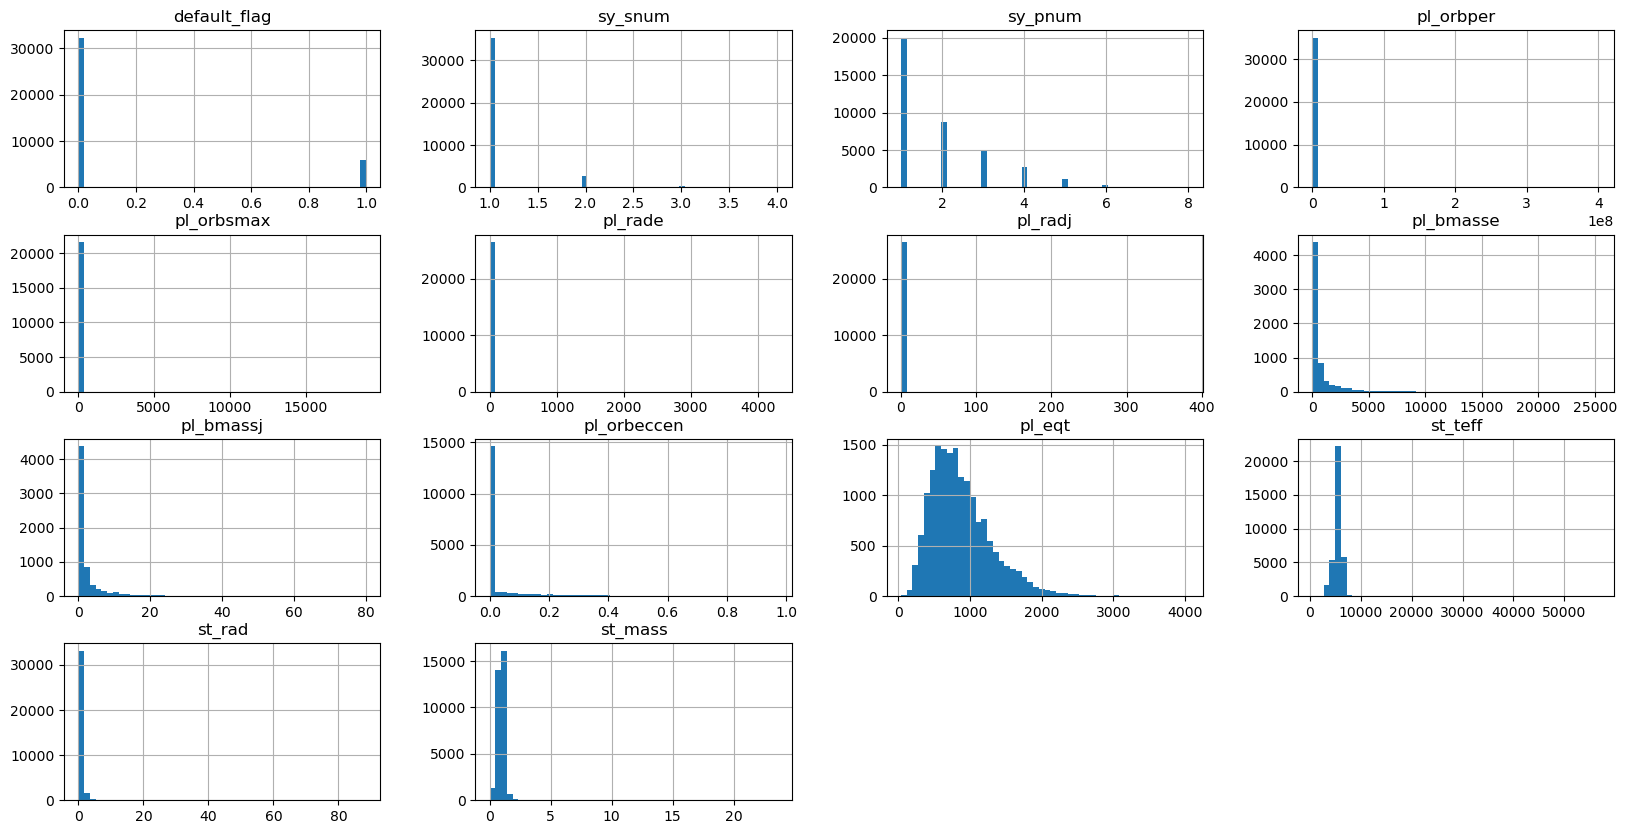

In [5]:
exoplanets.hist(figsize=(20, 10), bins=50)
plt.show()